# Car price prediction

### A car price prediction project involves building a machine learning model that can estimate the price of a car based on various features and factors. This type of project is valuable for both consumers and the automotive industry. Here's a detailed project description:

## Project Objective:
### The primary objective of this project is to develop a machine learning model that can accurately predict the price of a car based on its specifications, features, and other relevant factors. This can help potential buyers, sellers, and dealerships make informed decisions about car pricing.

## Dataset:
#### car_ID: represents a unique identifier for each car
#### symboling: car's risk level or insurance risk rating
#### CarName: contain the name or model of each car
#### fueltype: indicates the type of fuel the car uses(e.g., "gas" or "diesel").
#### aspiration: refers to the type of aspiration the car's engine has, such as "std" for standard aspiration or "turbo" for turbocharged engines
#### doornumber: number of doors on each car
#### carbody:  "sedan," "hatchback," "convertible,".
#### boreratio: refers to the ratio of the diameter of the engine's cylinders
#### horsepower: indicates the engine's power output in terms of mechanical power.
#### peakrpm:engine's peak rotational speed, usually measured in revolutions per minute (RPM).
#### citympg: represents the car's estimated miles per gallon (MPG) in city driving conditions.
#### highwaympg:  likely represents the car's estimated miles per gallon (MPG) in highway driving conditions.
#### price:indicates the price of the car, which is the target variable for price prediction models.

### Importing the dataset

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestRegressor

### Reading the dataset

In [3]:
file=pd.read_csv("C:/Users/ayush/OneDrive/Desktop/Data sc/datasets/CarPrice_Assignment.csv")

In [5]:
file.shape

(205, 26)

In [6]:
file.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Processing the dataset

In [7]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
file.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [11]:
file['CarName'].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

In [16]:
filtered_file = file[file['symboling'] < 0]
print(filtered_file.shape)

(25, 26)


In [17]:
filtered_file['CarName'].value_counts()

volvo 264gl                 2
volvo 244dl                 2
volvo 144ea                 2
toyota corolla              2
volvo 145e (sw)             2
dodge dart custom           1
toyota starlet              1
volvo diesel                1
volvo 245                   1
toyouta tercel              1
toyota mark ii              1
buick electra 225 custom    1
toyota corona               1
toyota celica gt            1
plymouth valiant            1
mitsubishi mirage g4        1
buick opel isuzu deluxe     1
buick skyhawk               1
buick century luxus (sw)    1
volvo 246                   1
Name: CarName, dtype: int64

In [18]:
file['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [19]:
filtered_file['fueltype'].value_counts()

gas       20
diesel     5
Name: fueltype, dtype: int64

### Data visualisation

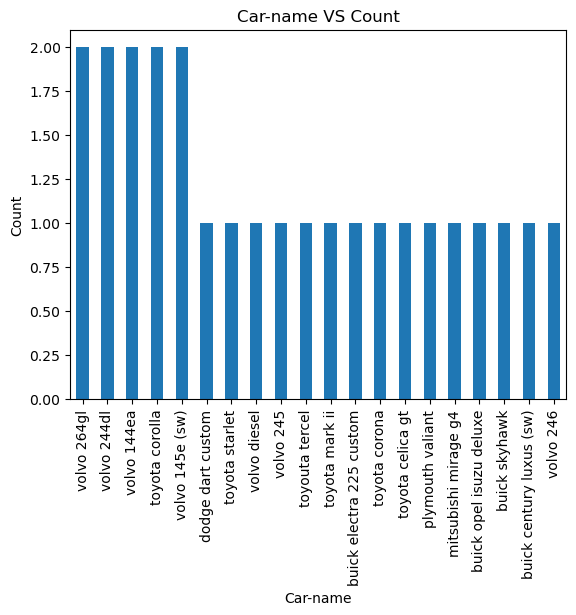

In [23]:
filtered_file['CarName'].value_counts().plot(kind='bar')

# Optionally, you can add labels and a title for the plot.
plt.xlabel('Car-name')
plt.ylabel('Count')
plt.title('Car-name VS Count')

# Show the plot
plt.show()

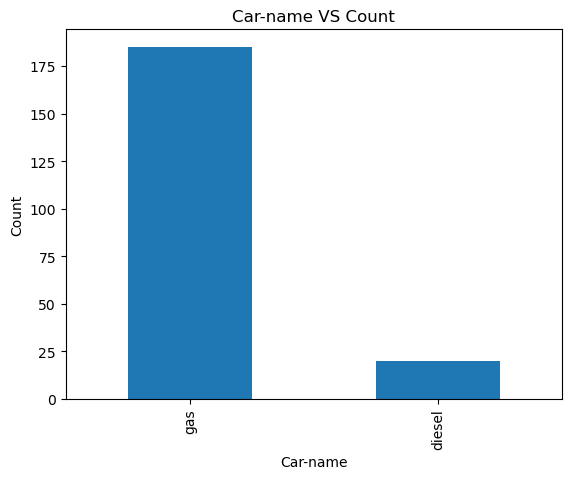

In [24]:
file['fueltype'].value_counts().plot(kind='bar')

# Optionally, you can add labels and a title for the plot.
plt.xlabel('Fuel-Type')
plt.ylabel('car Count')
plt.title('Fuel-Type VS Count')

# Show the plot
plt.show()

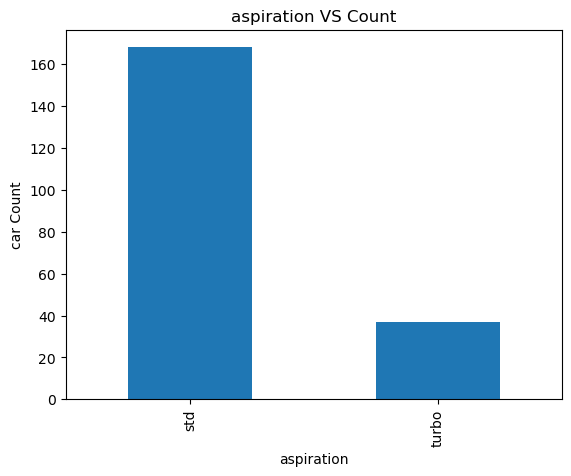

In [25]:
file['aspiration'].value_counts().plot(kind='bar')

# Optionally, you can add labels and a title for the plot.
plt.xlabel('aspiration')
plt.ylabel('car Count')
plt.title('aspiration VS Count')

# Show the plot
plt.show()

In [26]:
# Feature Selection and Engineering (you can add more features as needed)
features = ['symboling', 'wheelbase', 'enginesize', 'horsepower', 'citympg', 'highwaympg']
X =file[features]
y = file['price']

C:\Users\ayush\AppData\Local\Temp\ipykernel_14168\1453323441.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = file.corr()


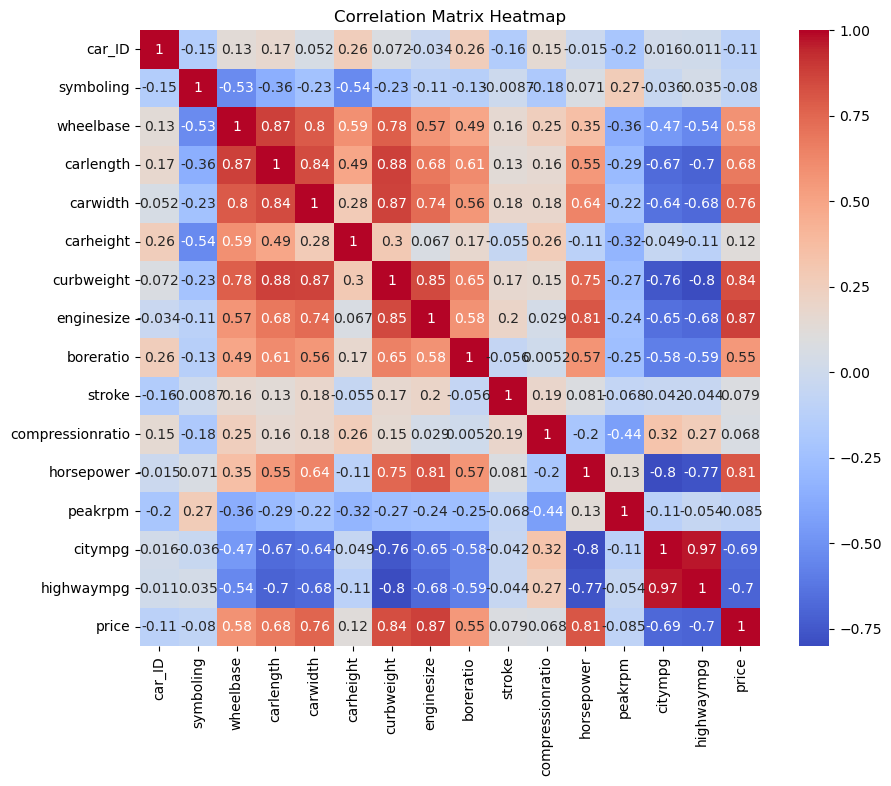

In [29]:
# Data Visualization
# ==================

# Correlation Matrix Heatmap
corr_matrix = file.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

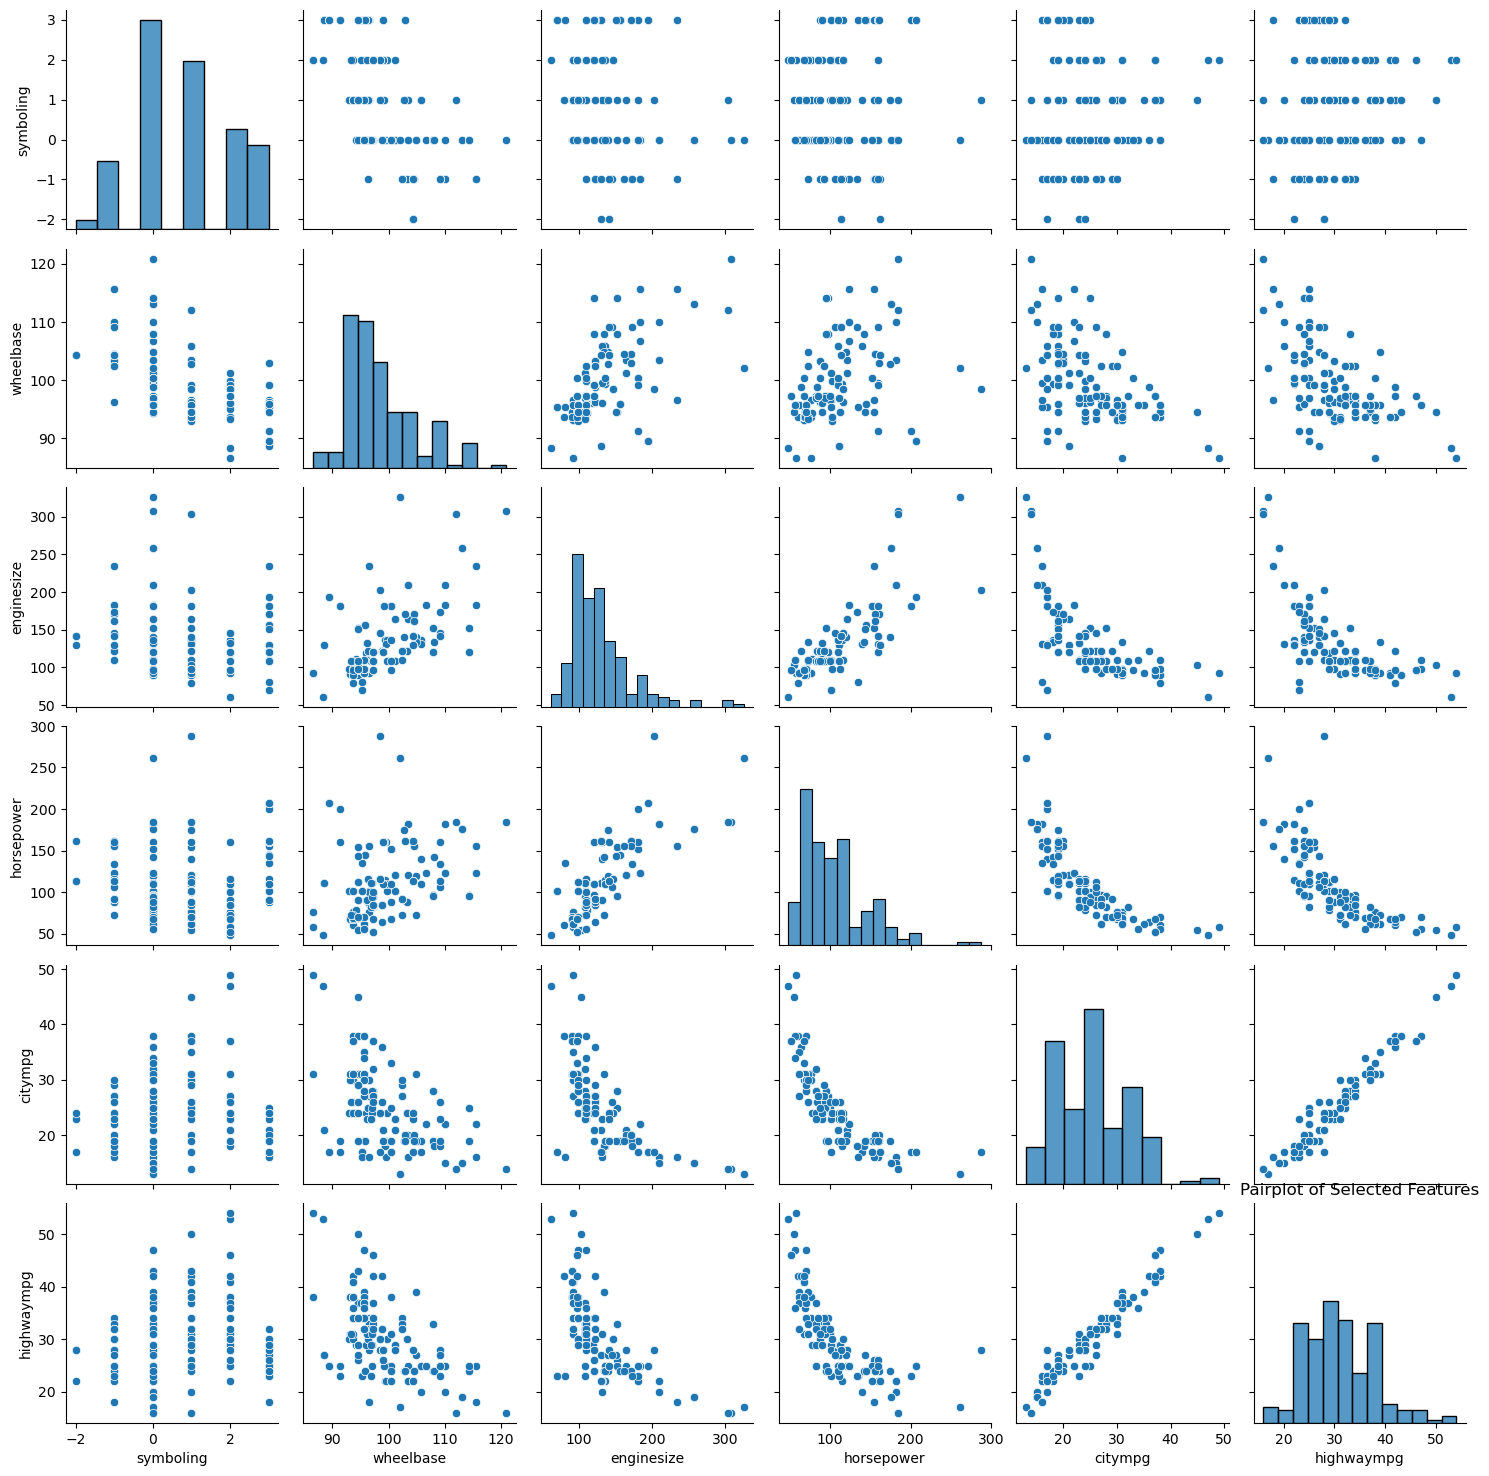

In [31]:
# Pairplot for Selected Features
sns.pairplot(file[features])
plt.title('Pairplot of Selected Features')
plt.show()

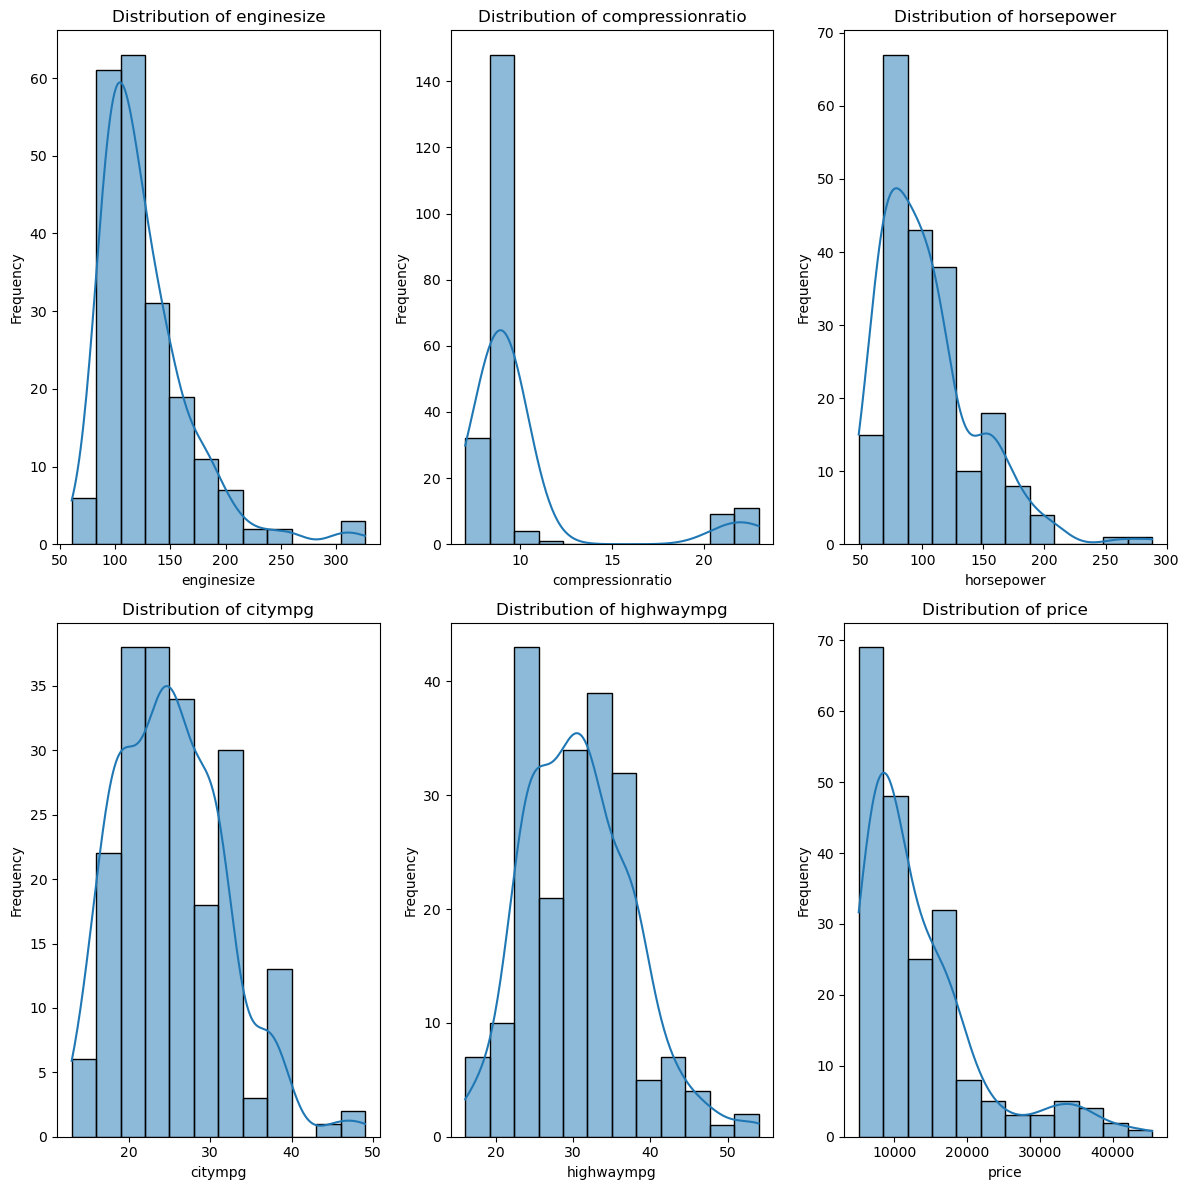

In [57]:
# Define the columns for which you want to create histograms
columns_to_plot = ['enginesize', 'compressionratio', 'horsepower', 'citympg', 'highwaympg', 'price']

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 12))

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# Iterate through the columns and create histograms
for i, column in enumerate(columns_to_plot):
    sns.histplot(data=file, x=column, bins=20, kde=True, ax=axes[i])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Distribution of {column}')

# Remove any empty subplots
for i in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

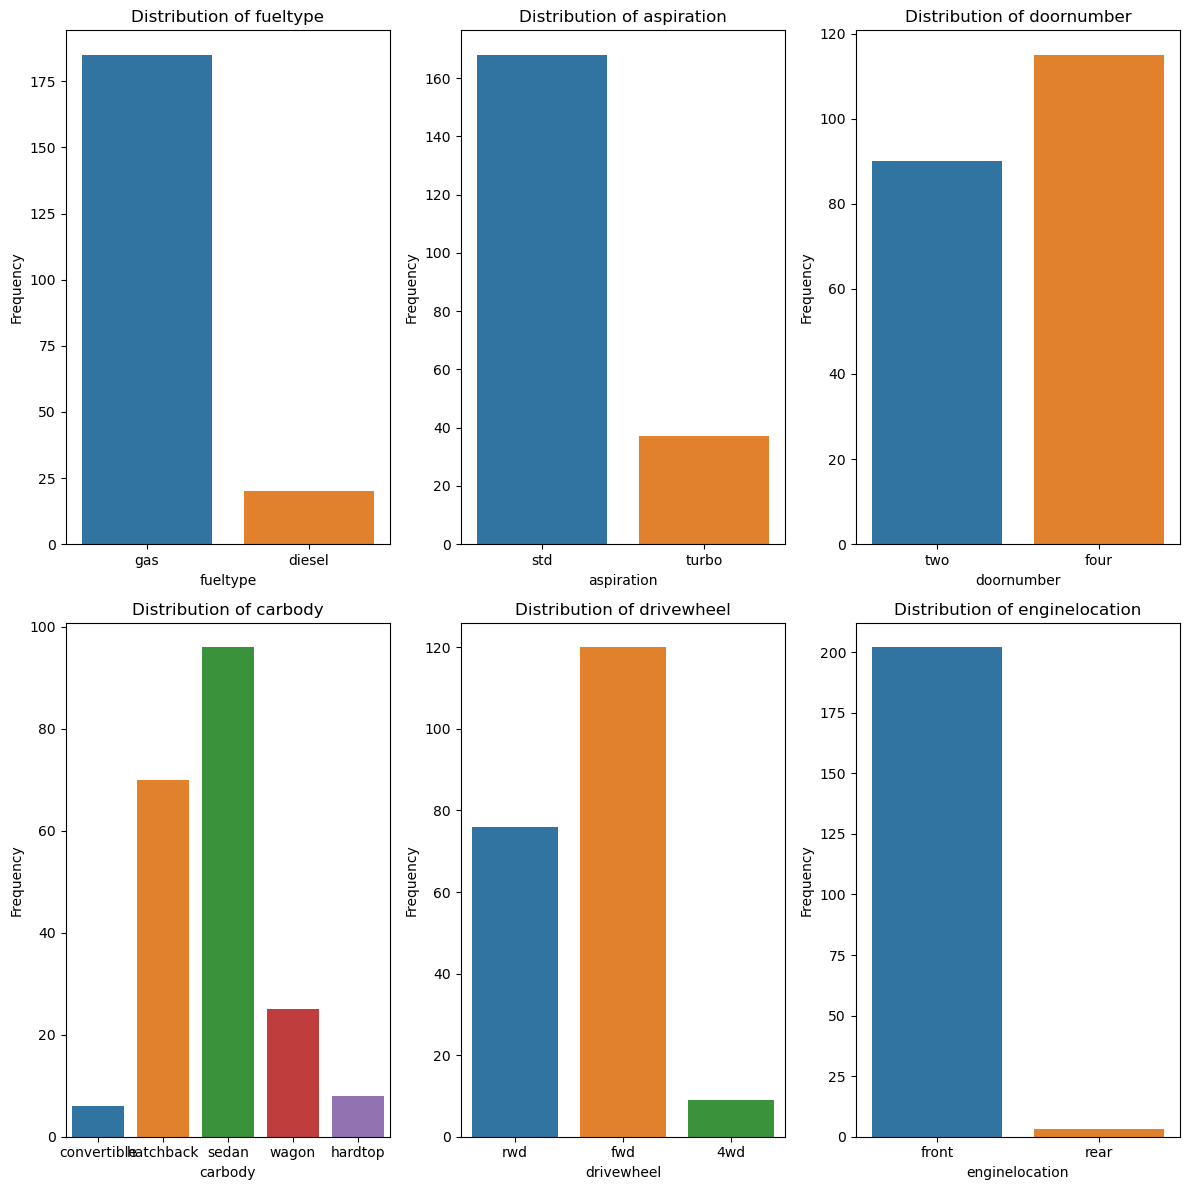

In [61]:
# Define the columns for which you want to create histograms
columns_to_plot = [ 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation']

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 12))

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# Iterate through the columns and create histograms
for i, column in enumerate(columns_to_plot):
    sns.countplot(data=file, x=column,ax=axes[i])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Distribution of {column}')

# Remove any empty subplots
for i in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

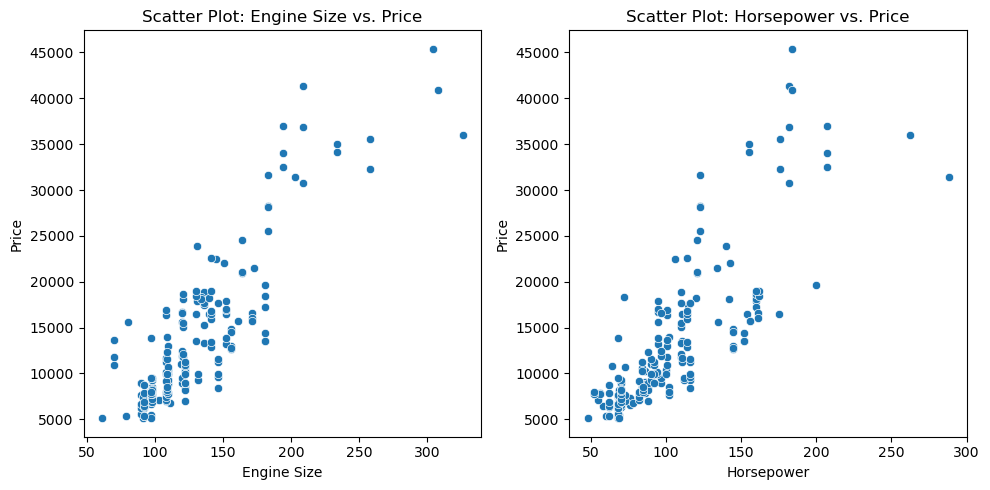

In [64]:
# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Scatter plot: Engine Size vs. Price
sns.scatterplot(data=file, x='enginesize', y='price', ax=axes[0])
axes[0].set_xlabel('Engine Size')
axes[0].set_ylabel('Price')
axes[0].set_title('Scatter Plot: Engine Size vs. Price')

# Scatter plot: Horsepower vs. Price
sns.scatterplot(data=file, x='horsepower', y='price', ax=axes[1])
axes[1].set_xlabel('Horsepower')
axes[1].set_ylabel('Price')
axes[1].set_title('Scatter Plot: Horsepower vs. Price')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### Training the model

### Linear regression is computationally efficient and can handle datasets with a large number of samples or features without significant computational overhead. This efficiency is useful when working with extensive car datasets.

Mean Squared Error: 14947593.74282524
R-squared: 0.8106557839812674


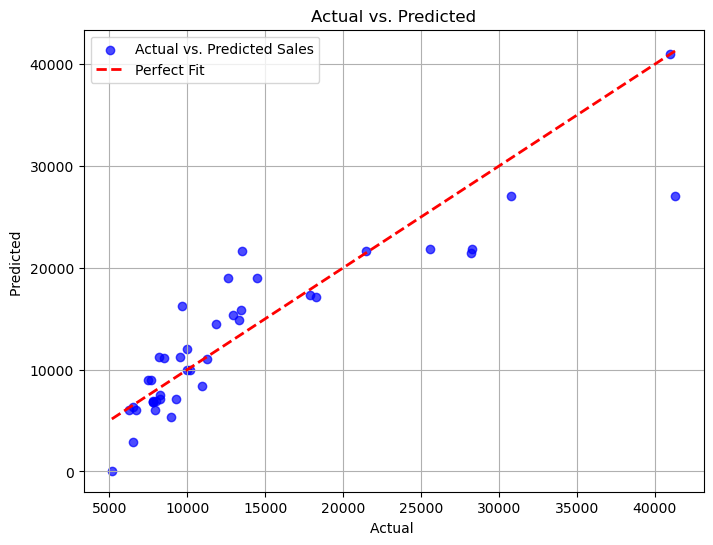

In [65]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualize the model's predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', marker='o', alpha=0.7, label='Actual vs. Predicted Sales')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Fit')
plt.xlabel("Actual ")
plt.ylabel("Predicted ")
plt.title("Actual vs. Predicted")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

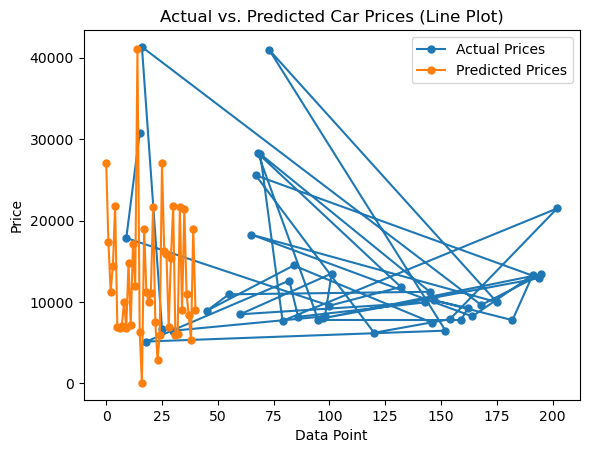

In [47]:
plt.plot(y_test, label='Actual Prices', linestyle='-', marker='o', markersize=5)
plt.plot(y_pred, label='Predicted Prices', linestyle='-', marker='o', markersize=5)
plt.xlabel('Data Point')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Car Prices (Line Plot)')
plt.legend()
plt.show()

### Training using random forest as it takes into account many decision trees, thereby giving more accurate trained model

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create a Random Forest regression model
# You can adjust hyperparameters as needed (e.g., n_estimators, max_depth, etc.)
rf_model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)

# Step 4: Train the model on the training set
rf_model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Step 6: Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 3518605.29
R-squared (R2): 0.96


### Random forest gives better result as compared to Linear regression

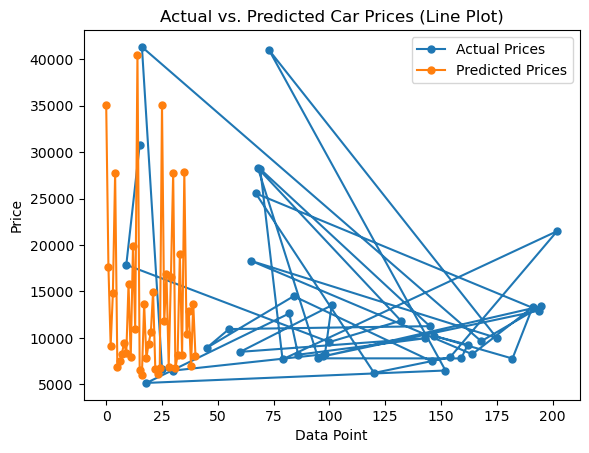

In [51]:
plt.plot(y_test, label='Actual Prices', linestyle='-', marker='o', markersize=5)
plt.plot(y_pred, label='Predicted Prices', linestyle='-', marker='o', markersize=5)
plt.xlabel('Data Point')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Car Prices (Line Plot)')
plt.legend()
plt.show()

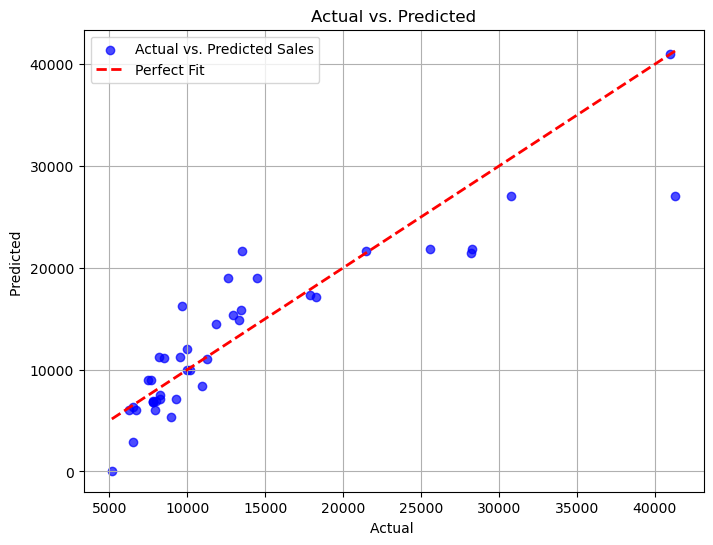

In [66]:
# Visualize the model's predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', marker='o', alpha=0.7, label='Actual vs. Predicted Sales')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Fit')
plt.xlabel("Actual ")
plt.ylabel("Predicted ")
plt.title("Actual vs. Predicted")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

### Random forest has better results than linear regression as more blue points(representing actual values) lies on the dotted red(predicted values) line.